<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go

# Исследование структуры данных

1. Прочитать данные с помощью библиотеки Pandas.  

In [70]:
hh_data = pd.read_csv('data/hh_database.csv', sep=';')
hh_data.shape

(44744, 12)

2. Вывести несколько первых (последних) строк таблицы, чтобы убедиться в том, что данные не повреждены. Ознакомиться с признаками и их структурой.

In [71]:
hh_data.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Вывести основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратить внимание на информацию о числе непустых значений.

In [72]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Вывести основную статистическую информацию о столбцах.


In [73]:
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Интересовать будет только уровень образования.

Создать с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполнить преобразование, ответить на контрольные вопросы и удалить признак "Образование и ВУЗ".


In [74]:
def education(arg):
    if arg[:1] == 'В':
        return 'Высшее'
    elif arg[:1] == 'Н':
        return 'Неоконченное высшее'
    elif arg[:19] == 'Среднее образование':
        return 'Среднее'
    else:
        return 'Среднее специальное'     
    
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(education)
hh_data = hh_data.drop('Образование и ВУЗ',axis = 1)
hh_data['Образование'].unique()
hh_data['Образование'].value_counts()

Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

---

2. Столбец **"Пол, возраст"**. Он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Необходимо выделить каждый параметр в отдельный столбец.

Создать два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполнить преобразование, ответить на контрольные вопросы и удалить признак **"Пол, возраст"** из таблицы.


In [75]:
def gender(arg):
    if 'Мужчина' in arg:
        return 'М'
    elif 'Женщина' in arg:
        return 'Ж'
    
def age(arg):
    arg_list = arg.split(' ')
    year = ["год", "года", "лет"]
    for i, e in enumerate(arg_list):
        if e in year:
            return int(arg_list[i-1])
   
hh_data['Пол'] = hh_data['Пол, возраст'].apply(gender)
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(age)
hh_data = hh_data.drop('Пол, возраст',axis = 1)
print(round(hh_data['Пол'].value_counts(normalize = True)['Ж'] * 100, 2))
print(hh_data['Возраст'].mean())

19.07
32.19674146254246


---

3. Преобразовать признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца необходимо выделить общий опыт работы соискателя в месяцах, новый признак назвать "Опыт работы (месяц)".

Условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Если встречается пропуск, оставлять его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность 

В результате преобразования должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполнить преобразование, ответить на контрольные вопросы и удалить столбец **"Опыт работы"** из таблицы.


In [76]:
def experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return None
    year = ['год', 'года', 'лет']
    month = ['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate(arg_splitted):
        if item in year:
            years = int(arg_splitted[index-1])
        if item in month:
            months = int(arg_splitted[index-1])
    return int(years * 12 + months)

hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(experience)
hh_data = hh_data.drop('Опыт работы',axis = 1)
hh_data['Опыт работы (месяц)'].median()

100.0

---

4. Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создать отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначить как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    
    Инфорация о метро, рядом с которым проживает соискатель не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратить внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратить внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Интересует только сам факт готовности к командировке.
    
    При выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. По умолчанию: такие соискатели не готовы к командировкам.
    
Выполнить преобразования и удалить столбец **"Город, переезд, командировки"** из таблицы.

In [77]:
def get_city(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                     ]
    city = arg.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'
    

def get_ready_to_move(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True
    
def get_ready_for_bisiness_trips(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False

hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_ready_to_move)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
hh_data = hh_data.drop('Город, переезд, командировки',axis = 1)
print(round(hh_data['Город'].value_counts(normalize = True)['Санкт-Петербург'] * 100 ))
print(round(hh_data[hh_data['Готовность к переезду'] & hh_data['Готовность к командировкам']].shape[0] / hh_data.shape[0] * 100 ))

11
32


---

5. Признаки **"Занятость"** и **"График"**. Признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу.

Создать признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>


Выполнить данное преобразование для признаков "Занятость" и "График", ответить на контрольные вопросы, после чего удалить их из таблицы.


In [78]:
schedules = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']

work_days = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']

for schedule, work_day in zip(schedules, work_days):
    hh_data[schedule] = hh_data['Занятость'].apply(lambda x: schedule in x)
    hh_data[work_day] = hh_data['График'].apply(lambda x: work_day in x)
hh_data = hh_data.drop('Занятость', axis = 1)
hh_data = hh_data.drop('График', axis = 1)
print(hh_data[hh_data['проектная работа'] & hh_data['волонтерство']].shape[0])
print(hh_data[hh_data['вахтовый метод'] & hh_data['гибкий график']].shape[0])

436
2311


---

6. Признак заработной платы **"ЗП"**. 
Помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Хотелось бы видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

Обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Уже сделана выгрузка курсов валют, которые встречаются в данных за период с 29.12.2017 по 05.12.2019.

Создать новый DataFrame из полученного файла. В полученной таблице интересуют столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Дата в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Интересует только дата, по ней и будут сопоставляться курсы валют.

Создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалить исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если они были созданны.

Возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [79]:
rates_data = pd.read_csv('data/ExchangeRates.csv', sep=',')

def get_salary(arg):
    salary = float(arg.split(' ')[0])
    return salary

def get_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]  
    
rates_data['date'] = pd.to_datetime(rates_data['date'], dayfirst = True).dt.date
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst = True).dt.date
hh_data['ЗП (tmp)'] = hh_data['ЗП'].apply(get_salary)
hh_data['Курс (tmp)'] = hh_data['ЗП'].apply(get_currency)

merged = hh_data.merge(
    rates_data,
    left_on = ['Курс (tmp)', 'Обновление резюме'],
    right_on = ['currency', 'date'],
    how = 'left'
)
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)    
hh_data['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']
hh_data = hh_data.drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1)
print(round(hh_data['ЗП (руб)'].median()/1000))
    

59


---

# Исследование зависимостей в данных

1. Построить распределение признака **"Возраст"**. Описать распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения причислить к их числу?

In [98]:
fig = px.histogram(
    data_frame = hh_data,
    x = 'Возраст',
    height = 600,
    width = 900,
    #nbins = 30,
    title = 'Распределение Возраста среди соискателей',
    marginal = 'box',
    histnorm = 'percent'
)

fig.write_html('plotly/1.html')
fig.show()


SyntaxError: invalid decimal literal (3821928277.py, line 14)

ВЫВОД:

* Модально значение распределения признака "Возраст" равно 30. 
* Предельные значения находятся в интервале возраста в 25-35 лет (28.3%). 
* Также видны аномальные значения возраста в 100 лет, что не может быть реальным, но при проверке становится понятно, что скорей всего, соискатель указал неверный возраст.  
* Соискатели в возрасте 76 и 77 лет на самом деле ищут работу, это не аномальные значения. 
* Также можно отметить соискателя в возрасте 14 лет, который ищет работу в должности "Ведущего инженер-программиста", что указывает на ошибку ввода.


----------------

2. Построить распределение признака **"Опыт работы (месяц)"**. Описать данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?

In [ ]:
fig = px.histogram(
    data_frame = hh_data,
    x = 'Опыт работы (месяц)',
    title = 'Распределение опыта работы в месяцах среди соискателей',
    histnorm = 'percent',
    width = 900,
    height = 600,
    marginal = 'box',
)

#hh_data['Опыт работы (месяц)'].mode()
fig.write_html('plotly/2.html')
fig.show()


ВЫВОД:

* Мода распределения равна 81. 
* Опыт большинства соискателей находится в интервале от 50 до 105-109 месяцев, потом падает и снова немного поднимается до 125-129 месяцев. 
* Аномальными (неверными значениями) я считаю, соискателя с опытом работы 1188 месяцев (99 лет), что не похоже на правду.

----------------

3. Построить распределение признака **"ЗП (руб)"**. Описать данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратить внимание на гигантские размеры желаемой заработной платы.

In [ ]:
fig = px.histogram(
    data_frame = hh_data,
    x ='ЗП (руб)',
    title = 'Распределение заработной платы в рублях среди соискателей',
    #histnorm='percent',
    width = 900,
    nbins = 700,
    marginal='box',
)

#hh_data[hh_data['ЗП (руб)'] > 1000000]
fig.write_html('plotly/3.html')
fig.show()

ВЫВОД: 
* Максимально значение признака желаемой заработной платы - около 27 миллионов рублей, что определенно является выбросом.
* Желаемая заработная плата большинства соискателей находится в масштабе 25 - 75 тысяч рублей.
* Аномалий признака возраста на данном графике нет.


------------

4. Построить диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Использовать для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделать выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Важен ли признак уровня образования при прогнозировании заработной платы?*

In [ ]:

bar_data = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby('Образование', as_index = False).median()
fig = px.bar(
    data_frame=bar_data,
    x='Образование',
    y='ЗП (руб)',
    title='Зависимость медианной желаемой зарплаты от уровня образования',
    height= 400,
    width = 700
)

fig.write_html('plotly/4.html')
fig.show()

ВЫВОД:

* На графике отчетливо видно, как наличие высшего образования (медианное значение - 60 тысяч) влияет на желаемую высокую заработную плату, что не удивительно. 
* На втором месте неоконченное образование
* На самом последнем - среднее образование. Люди со средним образованием (медианное значение 40 тысяч) ищут работу до 300 тысяч рублей. 
* Я считаю, признак уровня образования важен для прогнозирования заработной платы.

-------------

5. Построить диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Использовать для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайть выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:

box_data = hh_data[hh_data['ЗП (руб)'] < 1000000]
fig = px.box(
    data_frame=box_data,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение желаемой заработной платы в зависимости от города',
    height = 600,
    width = 900
)

fig.write_html('plotly/5.html')
fig.show()

ВЫВОД:

* Медианные уровни желаемой заработной платы и их размах зависит от города, что отчетливо видно на графике: Моква дорогой город - медианная желаемая зарплата тут выше всего: 85 тысяч. 
* Далее Санкт-Петербург - 60 тысяч. 
* Города-миллионники и другие города - по 40 тысяч. 
* Я считаю, что признак города важен при прогназировании заработной платы, что и подтверждаем график.

---------------

6. Построить **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализировать график, сравнив уровень заработной платы в категориях.

In [ ]:
group_data = hh_data.groupby(['Готовность к переезду', 'Готовность к командировкам'], as_index=False)['ЗП (руб)'].median()

fig = px.bar(
    data_frame=group_data,
    x = 'Готовность к командировкам',
    y = 'ЗП (руб)',
    color = 'Готовность к переезду',
    barmode = 'group',
    title = 'Зависимость медианной заработной платы от готовности к переезду и командировкам',
    text_auto=True
)

fig.write_html('plotly/6.html')
fig.show()

ВЫВОД:

* Соискатели с готовностью к переезду и командировкам рассчитывают на высокую заработную плату. 
* Соискатели не готовые к переездам/командировскам - рассчитывают на наименьшую заработную плату. 
* Соискатели, готовые к командировскам, но не готовые на переезд, расчитывают на заработную плату выше, чем те, кто готов к переезду, но не готовым к командировкам.

----------

7. Построить сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице построить **тепловую карту**. Проанализировать тепловую карту, сравнив показатели внутри групп.

In [ ]:

table = pd.pivot_table(
    hh_data,
    index = 'Образование',
    columns = 'Возраст',
    values = 'ЗП (руб)',
    aggfunc = 'median',
    fill_value = 0
)
fig = px.imshow(
    table,
    aspect='auto',
    color_continuous_scale='greens',
    title='Зависимость медианной желаемой зарплаты от возраста и образования',
    height= 500,
    width = 800
)

fig.write_html('plotly/7.html')
fig.show()

ВЫВОД:

* Соискатели с высшим образованием ищут работы с более высокой заработной платой
* Соискатели с неоконченным высшим образованием ищут работу также с достойной зарплатой, но по возрастная группа меньше, чем у соискателей с высшим образованием
* Возраст соискателей со средним образованием и меньше, чем возраст у соискателей со средним специальным обрарованием, однако, желаемая зарплата немного больше

-----

8. Построить **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы перевести из месяцев в года, чтобы признаки были в едином масштабе. Построить на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
hh_data['Опыт работы (год)'] = hh_data['Опыт работы (месяц)'] / 12

fig = px.scatter(
    data_frame=hh_data, 
    x = 'Возраст', 
    y = 'Опыт работы (год)', 
    #color='Возраст', 
    width=1000,
    height=600,
    title = 'Зависимость опыта работы от возраста'
)

fig.add_trace(go.Scatter(x = [0, 100], y = [0, 100], name = 'граница аномалий'))

hh_data = hh_data.drop(['Опыт работы (год)'], axis=1)
fig.write_html('plotly/8.html')
fig.show()

ВЫВОД:

* На данном графике видно 7 аномалий (при приближении), эти аномалии либо имеют одинаковый стаж и возраст, либо возраст превышает рабочий стаж.

----------------------

9. Построить график, который покажет сколько соискателей (в процентах) ищут стажировку.

In [ ]:
fig = px.pie(
    data_frame=hh_data,
    names='стажировка',
    height=500,
    width=700,
    title='Стажировка',
    hole=0.2
)

fig.write_html('plotly/9.html')
fig.show()

ВЫВОД:

* На графике видно, что только чуть больше 6% соискателей из 100 ищут именно стажировку.

---

10. Построить диаграмму процентального соотношения образования среди соискателей.

In [ ]:
fig = px.pie(
    data_frame=hh_data,
    names='Образование',
    height=500,
    width=700,
    title='Процентальное соотношения образования среди соискателей',
    hole=0.2
)
fig.write_html('plotly/10.html')
fig.show()

ВЫВОД:

* На круготовой диаграмме видно, что большинство (почти 76%) соискателей имеют высшее образование.
* Средне образование имеет меньшинство - 1.25%.
* Соискатели со средним специальным и неоконченным высшим образованием почти что процентально равны.

---

# Очистка данных

1. Найти **полные дубликаты** в таблице с резюме и удалить их. 

In [90]:
duplicates = hh_data[hh_data.duplicated(subset=hh_data.columns)]
hh_data = hh_data.drop_duplicates()
duplicates.shape[0]


161

2. Выведите информацию **о числе пропусков** в столбцах. 

In [91]:
null_data = hh_data.isnull().sum()
display(null_data[null_data > 0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

3. Есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполнить **медианным** значением.

In [92]:
m = hh_data.shape[1]
hh_data = hh_data.dropna(thresh=m-2, axis=0)
hh_data.shape[0]

44583

In [93]:
hh_data = hh_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы (месяц)'].fillna(hh_data['Опыт работы (месяц)'].median())
print(round(hh_data['Опыт работы (месяц)'].mean()))

114


4. Ликвидация выбросов. Сначала очистить данные вручную. Удалить резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [94]:
clear_data = hh_data[(hh_data['ЗП (руб)'] > 1000000) | (hh_data['ЗП (руб)'] < 1000)]
hh_data = hh_data.drop(clear_data.index)
clear_data.shape[0]


89

5. В процессе разведывательного анализа мы были обнаружены резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найти такие резюме и удалить их из данных.


In [95]:
clear_data_2 = hh_data[hh_data['Возраст'] <= hh_data['Опыт работы (месяц)'] / 12]
hh_data = hh_data.drop(clear_data_2.index)
clear_data_2.shape[0]

7

6. В результате анализа были обнаружены потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Построить распределение признака в **логарифмическом масштабе**. Добавить к графику линии, отображающие **среднее и границы интервала метода трех сигм**. 

В какую сторону асимметрично логарифмическое распределение? Написать об этом в комментарии к графику.
Найдити выбросы с помощью метода z-отклонения и удалить их из данных, использовать логарифмический масштаб. Сделать послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Вывести таблицу с полученными выбросами и оценить, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонений: 3
Результирующее число записей: 44482
14.642631884188171 69.10541234668786


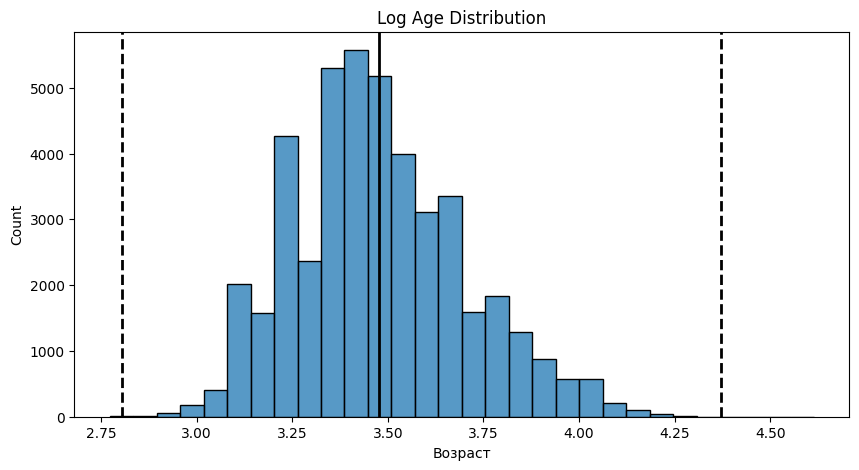

In [96]:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(hh_data, 'Возраст', left = 3, right = 4, log_scale = True)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

log_age = np.log(hh_data['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax = ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Age Distribution');

print(f'Число выбросов по методу z-отклонений: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
print(np.exp(2.75) - 1, np.exp(4.25) - 1)

ВЫВОД:

* Логарифмической распределение признака "Возраст" на представленном графике асимметрично правой стороне.
* Под категорию выбросов попадают соискатели в возрасте 14 и 69 лет.